<a href="https://colab.research.google.com/github/shrutiwaghade/MINI-PROJECT/blob/main/MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE CLASSIFICATION USING LOGISTIC REGRESSION**

In [ ]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
data = loadmat('/mnist-original.mat')
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Nov 21 21:16:23 2016',
 '__version__': '1.0',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]]),
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object)}

In [16]:
x = data['data']
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
y = data['label'].flatten()
y

array([0., 0., 0., ..., 9., 9., 9.])

In [35]:
x.shape
x = x.T

In [21]:
y.shape

(70000,)

In [36]:
df = pd.DataFrame(np.c_[x,y])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df[784].value_counts()

1.0    7877
7.0    7293
3.0    7141
2.0    6990
9.0    6958
0.0    6903
6.0    6876
8.0    6825
4.0    6824
5.0    6313
Name: 784, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


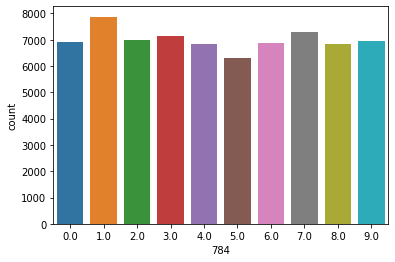

In [32]:
sns.countplot(df[784])

In [50]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=42)


In [51]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((52500, 784), (52500,), (17500, 784), (17500,))

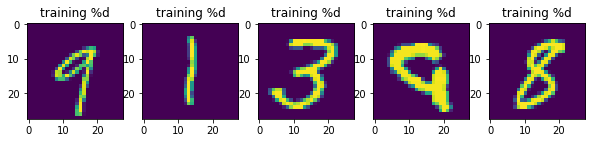

In [52]:
plt.figure(figsize=(10,4))
for index,(image,Label) in enumerate(zip(train_x[0:5],train_y[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image,(28,28)))
  plt.title('training %d')

In [53]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='lbfgs')
lg.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
pred = lg.predict(test_x)
pred

array([7., 8., 6., ..., 8., 9., 7.])

In [56]:
scores = lg.score(test_x,test_y)
scores

0.9222857142857143

EVALUATION OF MODEL

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,pred)

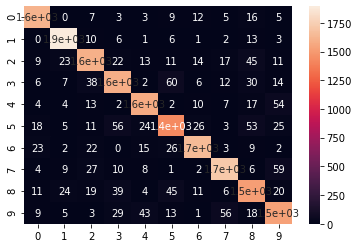

In [59]:
sns.heatmap(cm,annot=True)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1677
         1.0       0.96      0.98      0.97      1935
         2.0       0.91      0.91      0.91      1767
         3.0       0.91      0.90      0.90      1766
         4.0       0.93      0.93      0.93      1691
         5.0       0.89      0.87      0.88      1653
         6.0       0.95      0.94      0.95      1754
         7.0       0.94      0.93      0.94      1846
         8.0       0.88      0.89      0.89      1702
         9.0       0.89      0.90      0.89      1709

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



In [62]:
ypred_prob = lg.predict_proba(test_x)
ypred_prob

array([[2.42448227e-04, 3.46714777e-16, 3.27820449e-07, ...,
        9.92214930e-01, 4.92543913e-06, 7.44044541e-03],
       [6.90191507e-07, 1.96820314e-09, 6.26064305e-05, ...,
        7.71157167e-14, 9.99254353e-01, 6.44542156e-07],
       [1.36693552e-02, 1.63531135e-07, 6.63938783e-04, ...,
        1.90014205e-12, 1.25397710e-01, 9.86852770e-07],
       ...,
       [3.00362649e-06, 1.66240142e-05, 2.10551807e-03, ...,
        7.49980861e-11, 9.97147209e-01, 5.40303038e-04],
       [3.82860259e-08, 6.87471127e-15, 1.08360949e-07, ...,
        8.10529341e-02, 3.18426787e-04, 9.17340344e-01],
       [3.66093859e-09, 6.86534205e-08, 6.49816369e-07, ...,
        8.30919821e-01, 2.59334439e-05, 1.68806291e-01]])

MISCLASSIFIED IMAGES

In [64]:
index=0
m=[]
for label,predict in zip(test_y,pred):
  if label != predict:
    m.append(index)
  index +=1

In [65]:
m

[12,
 13,
 25,
 46,
 56,
 87,
 92,
 96,
 129,
 147,
 163,
 177,
 187,
 207,
 236,
 249,
 255,
 277,
 289,
 298,
 306,
 323,
 334,
 339,
 342,
 359,
 385,
 420,
 422,
 426,
 430,
 433,
 455,
 456,
 465,
 474,
 493,
 494,
 499,
 504,
 515,
 530,
 531,
 535,
 538,
 540,
 560,
 572,
 580,
 607,
 630,
 631,
 640,
 651,
 652,
 657,
 658,
 678,
 689,
 694,
 708,
 714,
 727,
 749,
 769,
 788,
 813,
 823,
 826,
 834,
 835,
 888,
 896,
 909,
 915,
 916,
 928,
 986,
 990,
 991,
 1027,
 1074,
 1075,
 1102,
 1110,
 1111,
 1112,
 1114,
 1116,
 1125,
 1139,
 1165,
 1174,
 1181,
 1184,
 1244,
 1278,
 1282,
 1292,
 1298,
 1299,
 1311,
 1316,
 1318,
 1347,
 1349,
 1354,
 1358,
 1366,
 1371,
 1374,
 1378,
 1390,
 1393,
 1413,
 1447,
 1454,
 1474,
 1482,
 1485,
 1491,
 1505,
 1528,
 1540,
 1573,
 1578,
 1579,
 1582,
 1599,
 1601,
 1610,
 1625,
 1628,
 1638,
 1644,
 1656,
 1662,
 1663,
 1679,
 1686,
 1693,
 1701,
 1711,
 1736,
 1740,
 1741,
 1746,
 1751,
 1759,
 1775,
 1779,
 1791,
 1793,
 1814,
 1821,
 18

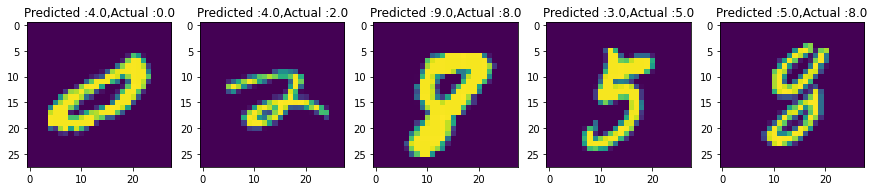

In [68]:
plt.figure(figsize=(15,4))
for i,j in enumerate(m[0:5]):
  plt.subplot(1,5,i+1)
  plt.imshow(np.reshape(test_x[j],(28,28)))
  plt.title('Predicted :{},Actual :{}'.format(pred[j],test_y[j]))
  plt.plot()